# Recommendar System based on search query

A well developed recommendation system will help businesses improve their shopper's experience on website and result in better customer acquisition and retention.<br>
The recommendation system, I have designed below is based on the search history of the user, i.e the system recommends products on a website(walmart/flipkart) based on users search query in different websites like amazon or google. The product recommendations can be based on textual clustering analysis given in product description and the search query term.

# Import modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.cluster import KMeans

# Load Dataset
The dataset i have used has 509 rows and 4 columns.

Columns:

    1: query - term searched by user on a website
    2: source - website name where the term was searched
    3: product_description - information about the product in the website
    4: product_link - web address of the product

In [2]:
df = pd.read_csv('browsing_data.csv',encoding='ISO-8859-1',index_col='_unit_id')
df = df.sample(frac = 1) 
df.shape

(509, 4)

In [3]:
df.columns

Index(['query', 'source', 'product_description', 'product_link'], dtype='object')

In [4]:
df.head()

,query,source,product_description,product_link
_unit_id,,,,
711160963,crocs,amazon,The tote gets a luxurious upgrade with this cu...,http://www.overstock.com/Clothing-Shoes/Dasein...
711174471,gold toe socks,flipkart,A great pair of socks for your little girl fro...,http://www.walmart.com/ip/Tic-Tac-Toe-Girls-Wh...
711175135,Watch women fossil,flipkart,Model: BQ1093. The shiny crystal studded appea...,http://www.walmart.com/ip/Fossil/43192544
711174853,Vanilla Scented Perfumes,flipkart,Givenchy Organza Perfume was originally design...,http://www.walmart.com/ip/Givenchy-Organza-Eau...
711165820,aroma diffuser,google.com,"Humidifier, purifier, and aromatherapy diffuse...",http://www.shop.com/nbts/p1170519476-xinternal...


### Check for missing values

In [5]:
df = df.dropna()
x1 = df[['query','product_description']]
x1.head()

,query,product_description
_unit_id,,
711160963,crocs,The tote gets a luxurious upgrade with this cu...
711174471,gold toe socks,A great pair of socks for your little girl fro...
711175135,Watch women fossil,Model: BQ1093. The shiny crystal studded appea...
711174853,Vanilla Scented Perfumes,Givenchy Organza Perfume was originally design...
711165820,aroma diffuser,"Humidifier, purifier, and aromatherapy diffuse..."


#### Feature extraction from product descriptions and query

Converting the text in product description and search query into numerical data for analysis.<br>
The text is converted into a term-frequency-inverse-document-frequency vector (tf-idf vector) for further analysis.
The text is preprocessed and stopwords are removed from it.<br>
This is done by creating a TfidfVectorizer object and fitting the query and product description column of dataset to the vectorizer.This creates a features dictionary whose values helps in transforming the rows in the dataset into tfidf vectors.<br>
A sparse matrix with float values is returned.

In [6]:
vectorizer = TfidfVectorizer(stop_words = 'english')
x = vectorizer.fit_transform(x1['query'],x1['product_description'])
x

<509x142 sparse matrix of type '<class 'numpy.float64'>'
	with 1132 stored elements in Compressed Sparse Row format>

### Feature Names
These values are the keys of the feature dictionary.

In [7]:
print(vectorizer.get_feature_names())

['15', '49ers', 'acoustic', 'adidas', 'aroma', 'bag', 'bags', 'batteries', 'bedspreads', 'bike', 'bird', 'black', 'blue', 'boot', 'boots', 'bras', 'brett', 'candle', 'chairs', 'clamp', 'clothes', 'coffee', 'conrad', 'cooker', 'cookware', 'corded', 'cowboy', 'cream', 'crocs', 'dc', 'diamond', 'diffuser', 'dinner', 'double', 'drawer', 'dress', 'dresses', 'drive', 'earbuds', 'ecco', 'eye', 'face', 'fair', 'favre', 'feeder', 'fifa', 'foam', 'fossil', 'fragance', 'francisco', 'gold', 'grinder', 'guitar', 'hard', 'headphones', 'headset', 'high', 'holders', 'ice', 'jeans', 'jersey', 'kitchen', 'kitchenaid', 'laptop', 'lauren', 'lc', 'led', 'lenovo', 'levis', 'lock', 'maker', 'mat', 'memory', 'mens', 'minecraft', 'mixer', 'monitor', 'mouse', 'mutant', 'necklace', 'nike', 'ninja', 'ny', 'organizer', 'oven', 'panasonic', 'pants', 'perfumes', 'pillow', 'pirates', 'pittsburgh', 'plain', 'plantronics', 'playstation', 'polarized', 'portable', 'pressure', 'rachel', 'rack', 'rain', 'ray', 'rechargable

## Visualizing product clusters in subset of data
A kmeans object is created with numnber of clusters = 10.<br>
We can observe words with similar characteristics being grouped into  different clusters in the graph. 

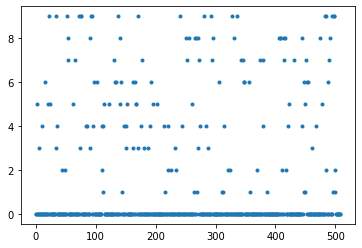

In [8]:
kmeans = KMeans(n_clusters = 10, init = 'k-means++')
y_kmeans = kmeans.fit_predict(x)
plt.plot(y_kmeans, ".")
plt.show()

#### Top words in each cluster based on product description and query term
The model is fitted with optimal number of clusters(=8, found out by comparing wcss with the number of clusters).<br>
The top 10 words within each cluster is printed out.We can see words like adidas,shoes,dress,crocs etc being grouped together in one cluster as they have similar meaning. Similarly, words with near meaning are grouped into different clusters.

In [9]:
# # Optimal clusters is 

true_k = 8

model = KMeans(n_clusters=true_k, init='k-means++', max_iter=200, n_init=10)
model.fit(x)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print



Top terms per cluster:
Cluster 0:
 playstation
 levis
 shoes
 dress
 cream
 crocs
 nike
 gold
 mixer
 pittsburgh
Cluster 1:
 silver
 ring
 necklace
 jeans
 fragance
 fossil
 foam
 fifa
 feeder
 favre
Cluster 2:
 boots
 cowboy
 snow
 feeder
 francisco
 fragance
 fossil
 foam
 fifa
 yoga
Cluster 3:
 adidas
 fragance
 pants
 yoga
 feeder
 gold
 francisco
 fossil
 foam
 fifa
Cluster 4:
 dresses
 conrad
 lc
 lauren
 feeder
 francisco
 fragance
 fossil
 foam
 fifa
Cluster 5:
 grinder
 coffee
 dress
 gold
 francisco
 fragance
 fossil
 foam
 fifa
 yoga
Cluster 6:
 drawer
 organizer
 guitar
 gold
 francisco
 fragance
 fossil
 foam
 fifa
 feeder
Cluster 7:
 mouse
 wireless
 favre
 gold
 francisco
 fragance
 fossil
 foam
 fifa
 feeder


#### Predicting clusters based on key search words

A random search term is taken and and transformed into numerical data. It is then passed to the model to predict the cluster number to which it belongs.

In [10]:
print("Cluster ID:")
Y = vectorizer.transform(["playstation"])
prediction = model.predict(Y)
print(prediction)

Cluster ID:
[0]


## Adding cluster data column to the original dataframe
A new column named cluster is created in the dataframe which contains the cluster id of values in each row.<br>
This is done by assigning the label attribute value of the model object to cluster column.

In [11]:
df['cluster'] = model.labels_

In [12]:
df['cluster'].value_counts()

0    389
2     22
1     21
3     20
4     17
6     15
5     14
7     11
Name: cluster, dtype: int64

In [13]:
df.sample(n=10)

,query,source,product_description,product_link,cluster
_unit_id,,,,,
711165299,eye cream,google.com,"A long-wearing, highly pigmented eye color tha...",http://www.shop.com/Motives+reg+Luxe+Cr+egrave...,0
711175103,LED monitor,flipkart,See what you're doing crisply and clearly on t...,http://www.walmart.com/ip/Acer-UM.VH6AA.004/41...,0
711165834,drawer organizer,google.com,* Drawer organizer * Sturdy * Great for drawer...,http://www.shop.com/Whitmor+6+Section+Clear+Dr...,6
711174539,nike womens,flipkart,"Posh and sporty, these women's Gaze 2 shades f...",http://www.walmart.com/ip/Nike-Women-s-Gaze-2-...,0
711174343,yellow dress,flipkart,How cute is this floral dress from the designe...,http://www.walmart.com/ip/Lipstik-Little-Girls...,0
711174987,spiderman,flipkart,Machine Wash Tumble Dry,http://www.walmart.com/ip/LIC-P5-NS-SPIDERMAN-...,0
711174433,Rechargable batteries,flipkart,Help keep your electronic devices powered with...,http://www.walmart.com/ip/Panasonic-Cordless-T...,0
711175743,wine rack,flipkart,This is handsome by itself or you can combine ...,http://www.walmart.com/ip/Winsome-Ancona-Modul...,0
711160959,crocs,amazon,Update classic style with modern comfort in th...,http://www.overstock.com/Clothing-Shoes/Crocs-...,0


# Recommendar Function
The function takes a search term and returns the link of product in walmart/flipkart.Also the function returns products similar to the search term.Once a cluster is identified based on the user's search words, the recommendation system displays links of items from the corresponding product clusters based on the product descriptions.  

In [14]:
def recomm_links(user_query,vectorizer=vectorizer,df=df):
    y = vectorizer.transform([user_query])
    cluster_id = model.predict(y)
    print(cluster_id)
    r = df.loc[(df['source']=='flipkart') & (df['cluster']==cluster_id[0]) & (df['query']==user_query)]
    r1 = df.loc[(df['source']=='flipkart') & (df['cluster']==cluster_id[0])]
    print("Same Product",r['product_link'])
    print("========================================")
    print("Similar Product",r1['product_link'].sample(n=10))

In [15]:
recomm_links('gold dress')

[0]
Same Product _unit_id
711174237    http://www.walmart.com/ip/Lipstik-Little-Girls...
711174234    http://www.walmart.com/ip/The-Rain-Kids-Girls-...
711174238    http://www.walmart.com/ip/Lipstik-Little-Girls...
711174236    http://www.walmart.com/ip/Lipstik-Little-Girls...
711174235    http://www.walmart.com/ip/Lipstik-Little-Girls...
Name: product_link, dtype: object
Similar Product _unit_id
711174274    http://www.walmart.com/ip/Women-s-Printed-Trel...
711175739    http://www.walmart.com/ip/Prepac-ESOW-0200-1-F...
711174640    http://www.walmart.com/ip/Columbus-Blue-Jacket...
711174397    http://www.walmart.com/ip/Signature-by-Levi-St...
711174533    http://www.walmart.com/ip/Pittsburgh-Pirates-s...
711174343    http://www.walmart.com/ip/Lipstik-Little-Girls...
711175882    http://www.walmart.com/ip/4-port-Sunflower-Mix...
711174541    http://www.walmart.com/ip/Nike-Golf-Women-s-2-...
711174339    http://www.walmart.com/ip/Rain-Kids-Girls-10-Y...
711174394    http://www.walmart.c